In [1]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/"
file_name = "enron_output_500_bis"
file = file_path+file_name+'.csv'

df_emails = pd.read_csv(file)
df_emails.tail(10)
deb = 0
fin = df_emails.shape[0]

file_name_out = file_name+'_clust'
print(file_name_out)

enron_output_500_bis_clust


In [3]:
# SAUVEGARDE en csv du résultat.
def svgd_csv_xls (file_path,file_name):

# to .CSV
  file_extension = ".csv"
  file = file_path+file_name+file_extension
  print("File : ",file)
  df_emails.to_csv(file, encoding='utf-8', index=False)
# df_emails[deb:fin].to_csv(file, encoding='utf-8', index=False)
  print("Svgde effectuée")
  return


In [4]:
df_emails.isna().sum()

date                   0
from                   0
to                     0
header                16
body                   0
cc                   500
NER_header           500
NER_body             500
body_clean             0
body_dict            500
summary_TFIDF        500
summary_TFIDF_sim    500
summary_spacy        500
summary_spacy_sim    500
summary_BART         500
summary_BART_sim     500
summary_T5           500
summary_T5_sim       500
best_sim             500
body_principal         0
dtype: int64

# A) Vectorization with TF-IDF Vectorizer




In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from nltk.corpus import stopwords

data = df_emails['body_principal']

#tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',max_features = 20000, decode_error='ignore')
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features=None ,decode_error='ignore')
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)

tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names_out()).head()


tf_idf_dtm = pd.DataFrame(tf_idf_norm.toarray(), columns=tf_idf_vectorizor.get_feature_names_out()).head()
tf_idf_dtm.shape

(5, 16327)

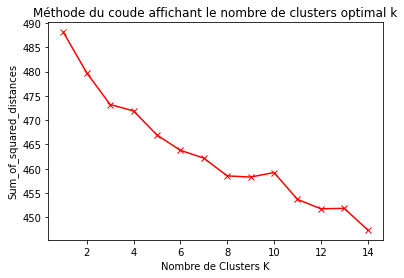

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=0)
   km = km.fit(tf_idf)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Méthode du coude affichant le nombre de clusters optimal k')
plt.show()

In [13]:
# update k en fonction du matplotlib precedent
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(tf_idf)
labels=model.labels_
#
df_emails["labels"]=pd.Series(labels)
df_emails["labels"].value_counts()

0    412
2     48
1     40
Name: labels, dtype: int64

In [14]:
# affichage labels sur un échantillon aléatoire
# df_emails[labels==3][["labels","NER_header","NER_body","header"]].sample(20)
df_emails[["labels","NER_header","NER_body","header","body_principal"]].sample(20)

,labels,NER_header,NER_body,header,body_principal
81,0,NaN,NaN,Well head,"X-Origin: Farmer-D, X-FileName: dfarmer.nsf St..."
416,0,NaN,NaN,AvantGo Travel Survey - Your help wanted!,"***********************, AvantGo Travel Surve..."
390,0,NaN,NaN,(01-50) Position Adjustment Deadlines for the ...,"X-FileName: sshackle.nsf Notice No. 01-50, Feb..."
453,0,NaN,NaN,Re: Cover letter - and the file !,Re: Cover letter I am sending you the Spanish...
283,0,NaN,NaN,Fuel Cell Purchase Order,"X-Origin: MANN-K, X-FileName: kmann.nsf Per my..."
205,0,NaN,NaN,RE: ENA DPR,Thanks for the info. A couple of things about...
478,0,NaN,NaN,Cal 02,Paul can transact El Paso Permian Cal 02 @ $3...
44,0,NaN,NaN,ASAP please -- EBS on site power deals,"ASAP please -- EBS on site power deals , EBS ..."
160,1,NaN,NaN,Re: RUSH Approval - ANP Power Marketing Company,Thanks for such a prompt response! tHarry M C...
167,0,NaN,NaN,"Ameren Energy Fuels, as Agent for 3 Utilities","X-Origin: Jones-T, X-FileName: TJONES Non-Priv..."


In [15]:

svgd_csv_xls (file_path,file_name_out)

File :  /content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/enron_output_500_bis_clust.csv
Svgde effectuée


# B) Vectorization with Count Vectorizer

In [17]:
# préparation du corpus de mots avec fonction de nettoyage
# prend une string / retourne une string

import re
def data_cleanstr(string):
    r = re.compile(r'[a-zA-Z0-9.-]*@[a-zA-Z0-9.-]*')
    tok=r.sub('mail', string)
    
    r = re.compile(r"([^a-zA-Z]+)")
    tok1=r.sub(' ', tok)
    return tok1

In [18]:
# préparation fonction stopwords
# prend une string / retourne une string


def remove_stop_words(text):
    import spacy
    from spacy.lang.en.stop_words import STOP_WORDS
    stopwords=list(STOP_WORDS)
    lst=[]

    for token in text.split():
        if token.lower() not in stopwords:    #checking whether the word is not 
            lst.append(token)                    #present in the stopword list.      
            result = ' '.join(lst)
    return result

In [21]:
# tokenisation du corpus de mots, utilisation de la fonction de nettoyage et mise en minuscules
# prend retourne un dataframe / retourne une liste
import nltk
nltk.download('punkt')

def tokenize_mots(df):    
    texte=[]
    phrases=""
    from nltk.tokenize import word_tokenize

    for i in df['body_principal']:
        phrases+=i  
    a=data_cleanstr(str(phrases))
    mots=word_tokenize(a)
    mots=[i.lower() for i in mots]
    return mots

# création liste mots pour corpus
mots=tokenize_mots(df_emails)

# création liste mots pour corpus sans Stopwords
from spacy.lang.en.stop_words import STOP_WORDS
stopwords=list(STOP_WORDS)
mots_sans=[]
for mot in mots:
    if mot not in stopwords:
        mots_sans.append(mot)
    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
# lematisation du corpus, 2 ere ligne à réactiver si besoin
# prend une liste / retourne une liste

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

def lematize_mots(corpus):
    from nltk.stem import WordNetLemmatizer

    # Initialiser un lemmatiseur
    wordnet_lemmatizer = WordNetLemmatizer()

    #Calculer le lemme du mot meeting
    corpus=[]
    for mot in mots_sans:
        a=""
        a=wordnet_lemmatizer.lemmatize(mot)
        corpus.append(a)
    return corpus


# création liste pour corpus
corpus=lematize_mots(mots)
corpus_sans=lematize_mots(mots_sans)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [34]:
# vectorisation du corpus de mots
# retourne un dictionnaire

def bagofwords(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # Créer un vectorisateur
    vectorizer = CountVectorizer()

    # Appliquer Bag of words à la variable tokens
    vectorizer.fit_transform(corpus).todense()

    # Récupération des tokens
    #tokenized = vectorizer.vocabulary_
    #token=dict(sorted(tokenized.items(),key= lambda x:x[1],reverse=True))
    #print(token)

    return vectorizer

vectorizer=bagofwords(corpus)
vectorizer_sans=bagofwords(corpus_sans)

CountVectorizer()

In [41]:
# vectorisation de chaque email 1 par 1 et enregistrement dans une colonne dédiée body_vect, au passage création de body_clean

texte=[]
# on duplique le contenu de df_emails vers df pour conserver les résultats antérieurs
df=df_emails
df['body_clean']=""
df["body_vect"]=""
df["body_vect_sans"]=""
for i,j in enumerate(df['body_principal']):
    text=data_cleanstr(str(j))
    df.loc[i,"body_clean"]=text
    df.loc[i,"body_vect"]=[vectorizer.transform([text]).toarray()]
    df.loc[i,"body_vect_sans"]=[vectorizer_sans.transform([text]).toarray()]
        
        
 
# liste contenant le corpus de mots, le premier avec les stopwords, le second sans les stopswords --> épuré des chiffres,
# et des signes de ponctuations ou autres

In [47]:
df.isna().sum()

date                   0
from                   0
to                     0
header                16
body                   0
cc                   500
NER_header           500
NER_body             500
body_clean             0
body_dict            500
summary_TFIDF        500
summary_TFIDF_sim    500
summary_spacy        500
summary_spacy_sim    500
summary_BART         500
summary_BART_sim     500
summary_T5           500
summary_T5_sim       500
best_sim             500
body_principal         0
labels                 0
body_vect              0
body_vect_sans         0
dtype: int64

In [48]:
#df=df.dropna()     # modif nicolas
lfunc = lambda e: e[0]
df['body_vect2']=df['body_vect'].map(lambda x:lfunc(x))
df['body_vect_sans2']=df['body_vect_sans'].map(lambda x:lfunc(x))
df.head(5)

,date,from,to,header,body,cc,NER_header,NER_body,body_clean,body_dict,...,summary_BART_sim,summary_T5,summary_T5_sim,best_sim,body_principal,labels,body_vect,body_vect_sans,body_vect2,body_vect_sans2
0,2000-06-27 05:33:00-07:00,phillip.allen@enron.com,kenneth.shulklapper@enron.com,gas storage model,"['', '---------------------- Forwarded by Phil...",NaN,NaN,NaN,gas storage model Mark We are currently back ...,NaN,...,NaN,NaN,NaN,NaN,"gas storage model , Mark , We are currently b...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2001-08-30 11:56:58-07:00,k..allen@enron.com,mike.grigsby@enron.com,FW: Nine Energy Services,"['', '', '', ' -----Original Message-----', 'F...",NaN,NaN,NaN,Original Message From tBradford William S Sen...,NaN,...,NaN,NaN,NaN,NaN,", -----Original Message-----, From: tBradford...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2001-05-13 07:27:00-07:00,john.arnold@enron.com,kimberly.hillis@enron.com,NaN,"['', 'Kim:', 'I will not be at the may 18 mana...",NaN,NaN,NaN,Kim I will not be at the may management mtg a...,NaN,...,NaN,NaN,NaN,NaN,"Kim:, I will not be at the may 18 management ...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,2001-09-26 16:28:52-07:00,jennifer.white@oceanenergy.com,john.arnold@enron.com,FW: RaceCarClub 2001 Party - Friday October 5 ...,"['X-FileName: JARNOLD (Non-Privileged).pst', '...",NaN,NaN,NaN,X FileName JARNOLD Non Privileged pst Hope you...,NaN,...,NaN,NaN,NaN,NaN,X-FileName: JARNOLD Non-Privileged .pst Hope y...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2001-10-17 04:57:28-07:00,caroline.abramo@enron.com,john.arnold@enron.com,RE: lot size eol/renaissance/other funds,"['', 'thanks smart ass.. let me know when this...",NaN,NaN,NaN,thanks smart ass let me know when this change...,NaN,...,NaN,NaN,NaN,NaN,thanks smart ass.. let me know when this chan...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


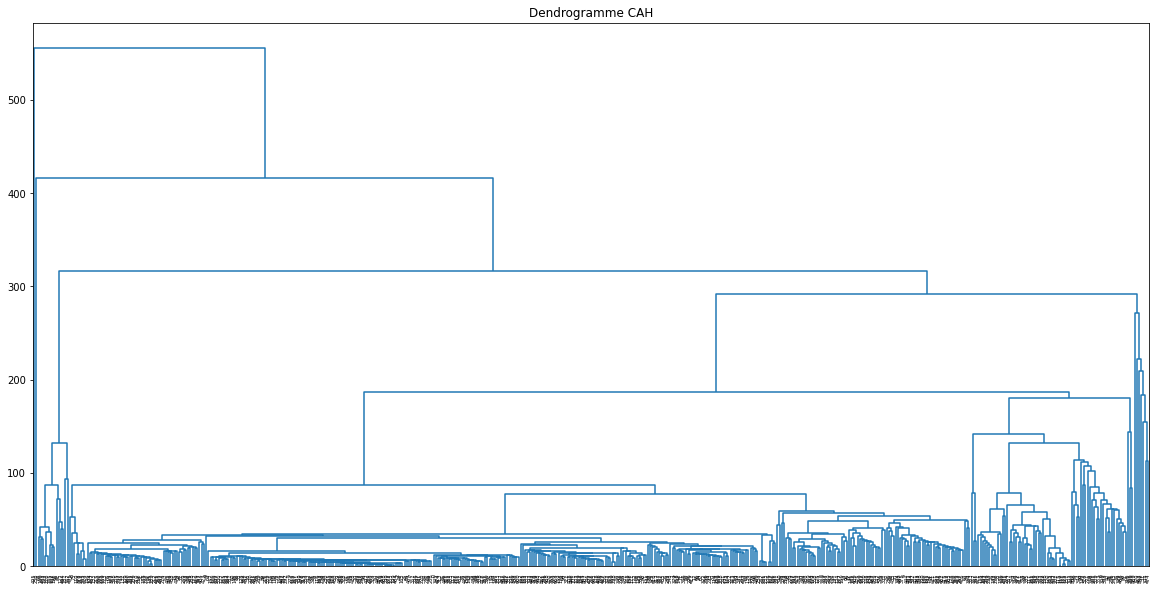

In [49]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Initialisaion de la figrue
plt.figure(figsize=(20, 10))

body_linkage = np.concatenate([i.reshape((1,-1)) for i in df.body_vect2.values], axis=0)
Z = linkage(body_linkage, method = 'ward', metric = 'euclidean')


plt.title("Dendrogramme CAH")
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 0)
plt.show()

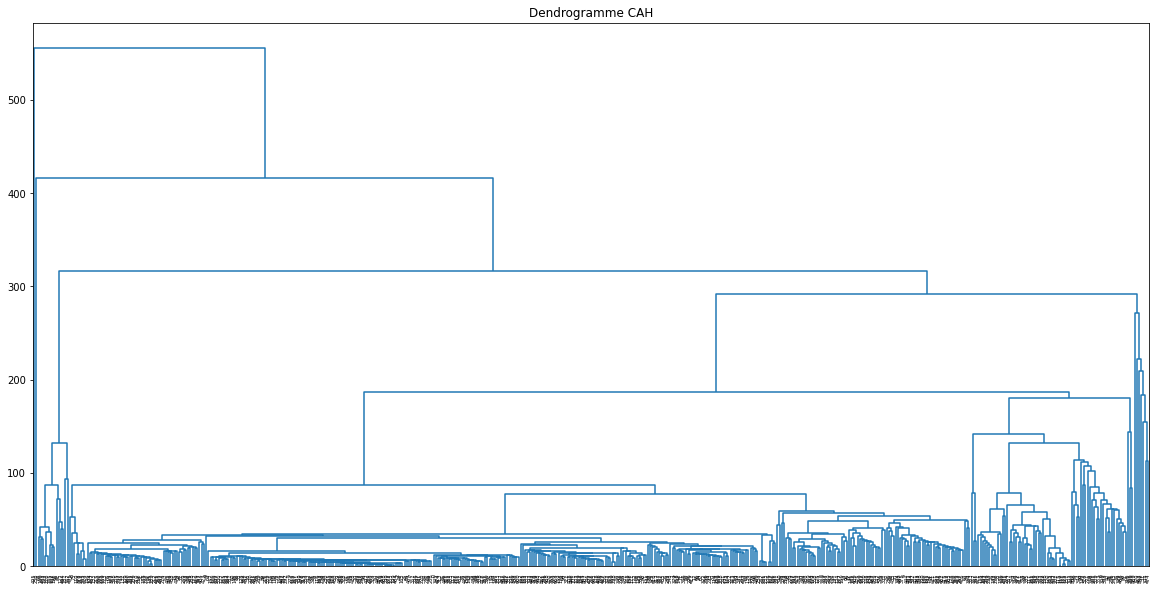

In [50]:
body_linkage_sans = np.concatenate([i.reshape((1,-1)) for i in df.body_vect_sans2.values], axis=0)
Z = linkage(body_linkage, method = 'ward', metric = 'euclidean')

plt.figure(figsize=(20, 10))
plt.title("Dendrogramme CAH")
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 0)
plt.show()

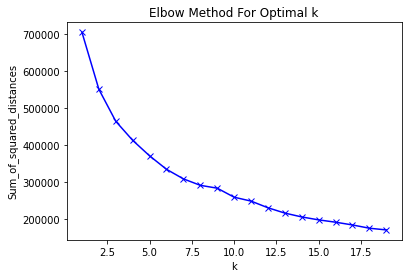

In [51]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=0)
   km = km.fit(body_linkage)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

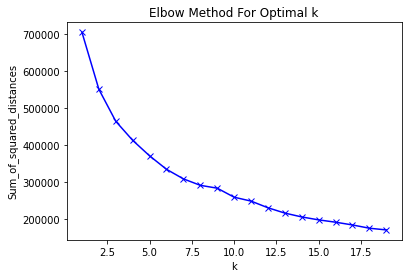

In [52]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=0)
   km = km.fit(body_linkage_sans)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [53]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(body_linkage)
labels=model.labels_

print(pd.Series(labels))
print(len(df))

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    0
497    0
498    0
499    0
Length: 500, dtype: int32
500


In [54]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(body_linkage_sans)
labels_sans=model.labels_

print(pd.Series(labels))
print(len(df))

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    0
497    0
498    0
499    0
Length: 500, dtype: int32
500


In [55]:
df[df['labels']==1][['body_clean','labels']]

,body_clean,labels
68,Re ENA Associate Analyst Dinner I believe thi...,1
83,Re Cornhusker John I have a draft that I have...,1
97,mail X From Scott Mills X To Dave Nommensen X ...,1
98,Re Imbalance trades on CNG Hi team Laurie has...,1
101,X Origin Giron D X FileName dgiron nsf Genaro ...,1
102,Forwarded by Darron C Giron HOU ECT on AM Fro...,1
111,New Generation as of Oct th Forwarded by Phil...,1
123,Please put on my schedule Mark Forwarded by M...,1
125,Bryan Bobs number is Let me know your impress...,1
151,X Origin HYVL D X FileName dhyvl nsf Susan I a...,1


In [56]:
df[df['labels_sans']==1][['body_clean','labels_sans']]

KeyError: ignored

In [57]:
df[df['labels']==2][['body_clean','labels']]

,body_clean,labels
8,Inline attachment follows From O ENRON OU NA ...,2
35,you snooze you lose i wouldnt mind a little r...,2
55,X bcc X Folder Jeff Dasovich Dec Notes Folders...,2
75,X To DL NETCO Gas Traders O ENRON OU NA CN REC...,2
76,Sorry I didnt get back to you I have to run s...,2
91,X bcc X Folder Drew Fossum Dec June Notes Fold...,2
110,X To Maggi Mike O ENRON OU NA CN RECIPIENTS CN...,2
115,mail mail mail mail mail mail mail mail mail m...,2
119,mail mail mail mail mail mail mail mail mail m...,2
120,mail mail mail mail mail mail X From Schedule ...,2


In [58]:
df[df['labels_sans']==2][['body_clean','labels_sans']]

KeyError: ignored

# Bibliographie ou References

In [ ]:
# https://medium.com/towards-data-science/k-means-clustering-8e1e64c1561c
# a voir ? https://www.kaggle.com/code/dfoly1/k-means-clustering-from-scratch/notebook
# https://www.kaggle.com/code/longtng/nlp-preprocessing-feature-extraction-methods-a-z
# https://www.kaggle.com/code/dikshabhati2002/nlp-for-beginners
# https://www.kaggle.com/code/ashagutlapalli/nlp-101-with-nltk-and-spacy-text-analysis
# https://www.kaggle.com/code/liruffel/atelier-nlp/notebook

# guide A a Z Preprocessing : https://www.kaggle.com/code/longtng/nlp-preprocessing-feature-extraction-methods-a-z